# AWS S3 support
 * Streams in data that is needed 
 * Useful is you spin down/up a AWS machine

In [10]:
import vaex
import numpy as np
df = vaex.open('s3://vaex/taxi/yellow_taxi_2015_f32s.hdf5?anon=true')

In [11]:
df

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2014-12-16 02:26:00.000000000,2014-12-16 02:28:00.000000000,1,CSH,1.090000033378601,-73.98672485351562,40.75642013549805,1.0,nan,-73.9964599609375,40.74289321899414,5.0,0.5,0.5,0.0,0.0,6.0
1,VTS,2014-12-15 18:23:00.000000000,2014-12-15 18:58:00.000000000,2,,6.28000020980835,-74.00418853759766,40.72119140625,1.0,nan,-73.97000122070312,nan,nan,nan,nan,nan,nan,nan
2,VTS,2015-01-15 19:05:39.000000000,2015-01-15 19:23:42.000000000,1,1,1.590000033378601,-73.993896484375,40.7501106262207,1.0,0.0,-73.97478485107422,40.75061798095703,12.0,1.0,0.5,3.25,0.0,17.049999237060547
3,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:53:28.000000000,1,1,3.299999952316284,-74.00164794921875,40.7242431640625,1.0,0.0,-73.99441528320312,40.75910949707031,14.5,0.5,0.5,2.0,0.0,17.799999237060547
4,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:43:41.000000000,1,2,1.7999999523162842,-73.96334075927734,40.80278778076172,1.0,0.0,-73.95182037353516,40.82441329956055,9.5,0.5,0.5,0.0,0.0,10.800000190734863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"146,112,986",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2000000476837158,-73.99381256103516,40.72087097167969,1.0,0.0,-73.98621368408203,40.722469329833984,7.5,0.5,0.5,1.7599999904632568,0.0,10.5600004196167
"146,112,987",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527099609375,40.76028060913086,1.0,0.0,-73.93951416015625,40.75238800048828,7.5,0.5,0.5,0.0,0.0,8.800000190734863
"146,112,988",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.799999952316284,-73.98729705810547,40.739078521728516,1.0,0.0,-73.9886703491211,40.69329833984375,13.5,0.5,0.5,0.0,0.0,14.800000190734863
"146,112,989",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.9600000381469727,-73.99755859375,40.72569274902344,1.0,0.0,-74.01712036132812,40.705322265625,8.5,0.5,0.5,0.0,0.0,9.800000190734863


In [ ]:
df.passenger_count.sum(progress=True)

# Remote dataframe
 * Data at server
 * State changes at client
 * Server is stateless
    * but does some caching for optmization

In [3]:
token = open('token-STSci.txt').read().strip()
df = vaex.open(f'ws://ec2-18-222-183-211.us-east-2.compute.amazonaws.com:9000/gaia_ps1_nochunk?token_trusted={token}')

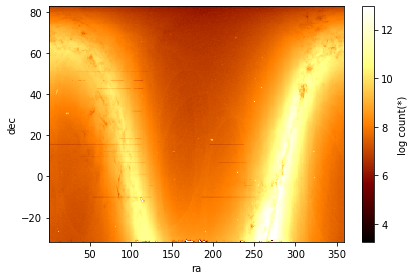

In [4]:
df.plot('ra', 'dec', f='log')

In [5]:
np.deg2rad(df.ra)

Expression = deg2rad(ra)
Length: 928,000,000 dtype: float64 (expression)
-----------------------------------------------
        0  1.99588
        1  1.99594
        2    1.996
        3  1.99602
        4  1.99593
       ...        
927999995  1.95381
927999996  1.95404
927999997  1.95398
927999998   1.9541
927999999  1.95396

# xarray support
 * binby instead of groupby

In [6]:
import vaex
df = vaex.open('/data/yellow_taxi_2009_2015_f32.hdf5')
df = df.dropna(column_names=['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude'])
df

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.630000114440918,-73.99195861816406,40.72156524658203,nan,nan,-73.99380493164062,40.6959228515625,8.899999618530273,0.5,nan,0.0,0.0,9.399999618530273
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.550000190734863,-73.98210144042969,40.736289978027344,nan,nan,-73.95584869384766,40.768028259277344,12.100000381469727,0.5,nan,2.0,0.0,14.600000381469727
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.350000381469727,-74.0025863647461,40.73974609375,nan,nan,-73.86997985839844,40.770225524902344,23.700000762939453,0.0,nan,4.739999771118164,0.0,28.440000534057617
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5.0,-73.9742660522461,40.79095458984375,nan,nan,-73.9965591430664,40.731849670410156,14.899999618530273,0.5,nan,3.049999952316284,0.0,18.450000762939453
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4000000059604645,-74.00157928466797,40.719383239746094,nan,nan,-74.00837707519531,40.7203483581543,3.700000047683716,0.0,nan,0.0,0.0,3.700000047683716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,173,057,921",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2000000476837158,-73.99381256103516,40.72087097167969,1.0,0.0,-73.98621368408203,40.722469329833984,7.5,0.5,0.5,1.7599999904632568,0.0,10.5600004196167
"1,173,057,922",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527099609375,40.76028060913086,1.0,0.0,-73.93951416015625,40.75238800048828,7.5,0.5,0.5,0.0,0.0,8.800000190734863
"1,173,057,923",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.799999952316284,-73.98729705810547,40.739078521728516,1.0,0.0,-73.9886703491211,40.69329833984375,13.5,0.5,0.5,0.0,0.0,14.800000190734863
"1,173,057,924",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.9600000381469727,-73.99755859375,40.72569274902344,1.0,0.0,-74.01712036132812,40.705322265625,8.5,0.5,0.5,0.0,0.0,9.800000190734863


In [7]:
# Define a mapping dictionary
map_payment_type = {'csh': 2, 'crd': 1, 'cash': 2, '1': 1, 'cas': 2, '2': 2, 'credit': 1, 'cre': 1, 'unk': 5, 
                    'noc': 3, 'no charge': 3, '3':3, 'dis': 4, 'no ': 3, '4': 4, 'dispute': 4, 'na ': 5, '5':5}

df['payment_type'] = df.payment_type.str.lower().map(map_payment_type, 
                                                                  default_value=7, 
                                                                  allow_missing=True) -1
df.categorize(df.payment_type, labels=['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip', 'NA'],
             check=False)

In [8]:
da = df.binby([
    vaex.groupby.BinnerTime.per_month(df.pickup_datetime),
    df.payment_type
], agg='count')
da

<xarray.DataArray (pickup_datetime: 85, payment_type: 6)>
array([[ 3024673, 11019572,    40118,     8050,        0,        0],
       [ 3132474, 10196900,    42024,     8724,        0,        0],
       [ 3476019, 10856177,    46318,     8857,        0,        0],
       ...,
       [ 7229578,  4028129,    41353,    13612,        4,        0],
       [ 7174215,  4226926,    44304,    15125,        3,        0],
       [       0,        0,        0,        0,        0,        0]])
Coordinates:
  * pickup_datetime  (pickup_datetime) datetime64[ns] 2009-01-01 ... 2016-01-01
  * payment_type     (payment_type) int64 0 1 2 3 4 6

/home/maartenbreddels/miniconda3/envs/vaex-dev/lib/python3.7/site-packages/xarray/core/computation.py:565: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/maartenbreddels/miniconda3/envs/vaex-dev/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


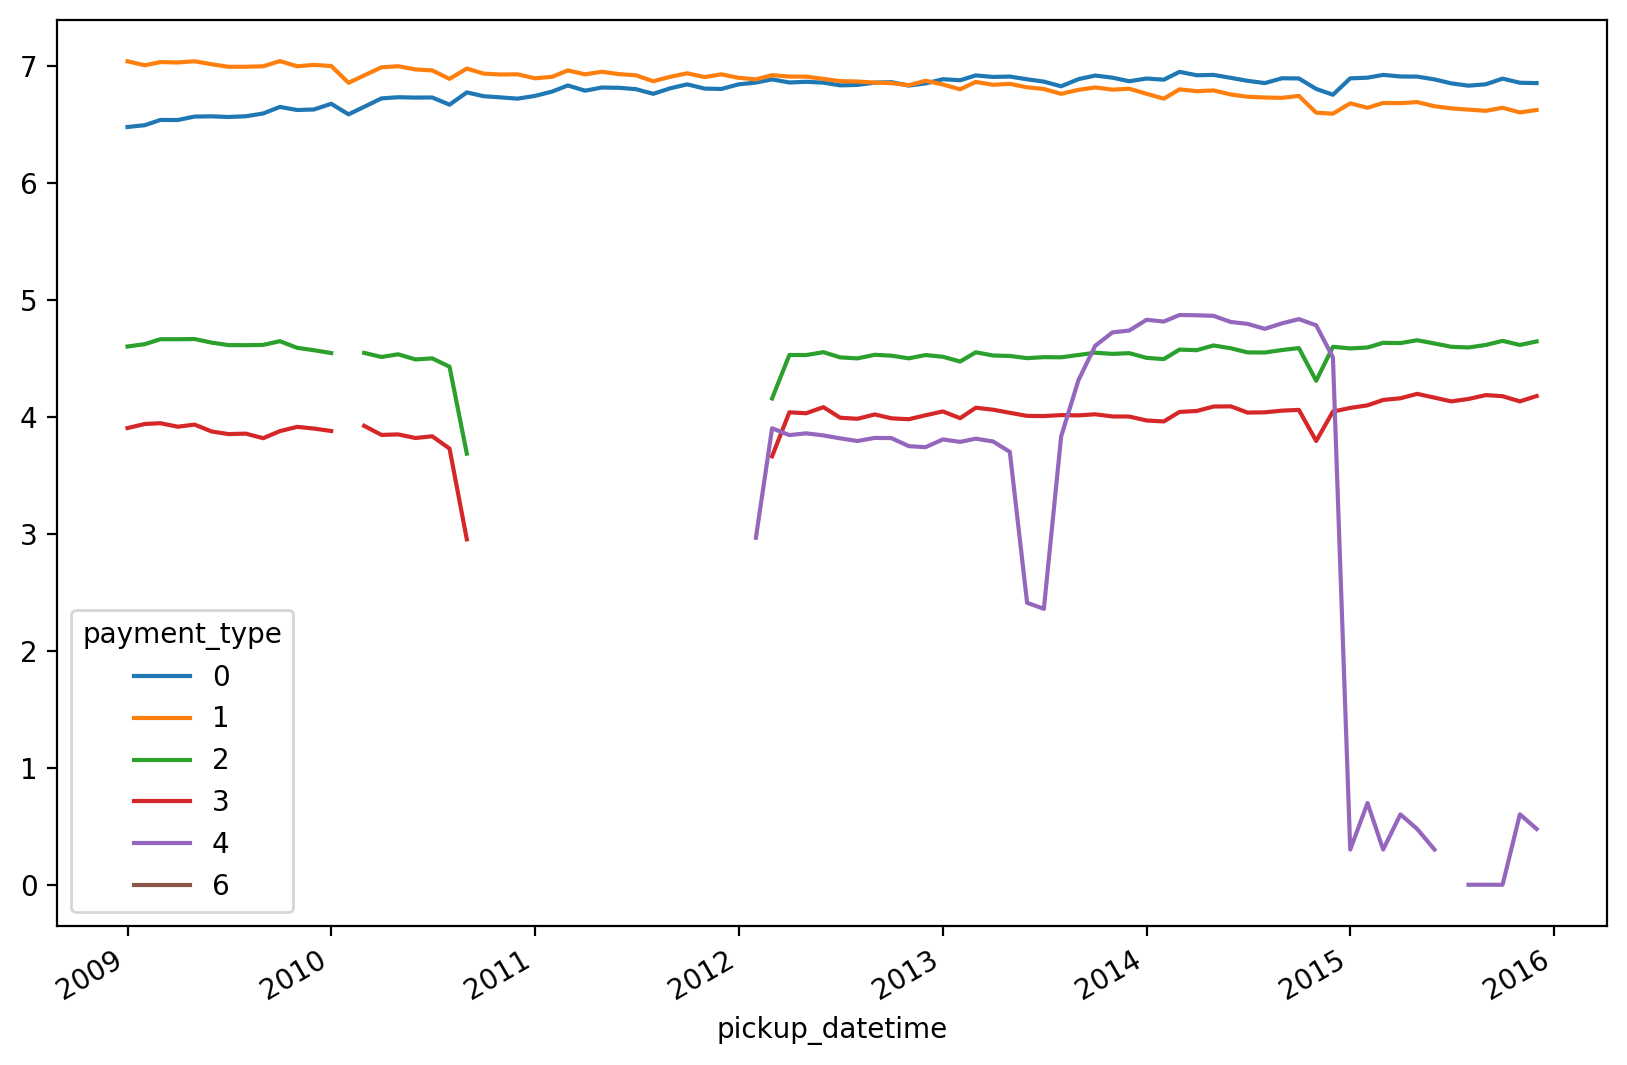

In [9]:
import numpy as np
import pylab as plt
plt.figure(figsize=(10,6), dpi=200)
np.log10(da).plot(hue='payment_type');